In [1]:
## Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix

In [2]:
## Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

In [3]:
## Build improved model (Functional API + BatchNorm + Dropout)
## CNN model with glorot_uniform everywhere
inputs = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu',
           kernel_initializer='glorot_uniform')(inputs)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu',
           kernel_initializer='glorot_uniform')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu',
           kernel_initializer='glorot_uniform')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu',
           kernel_initializer='glorot_uniform')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu',
           kernel_initializer='glorot_uniform')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

x = Flatten()(x)
x = Dense(256, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax', kernel_initializer='glorot_uniform')(x)

model = Model(inputs=inputs, outputs=outputs)

In [4]:
## Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
## Early stopping
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [6]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,434 (2.55 MB)

 Trainable params: 666,986 (2.54 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
## Train
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=128,
    callbacks=[callback]
)

Epoch 1/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 74s 193ms/step - accuracy: 0.2669 - loss: 2.2240 - val_accuracy: 0.2008 - val_loss: 3.9605
Epoch 2/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 67s 192ms/step - accuracy: 0.4500 - loss: 1.5020 - val_accuracy: 0.5474 - val_loss: 1.4265
Epoch 3/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 67s 189ms/step - accuracy: 0.5548 - loss: 1.2396 - val_accuracy: 0.5802 - val_loss: 1.1453
Epoch 4/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 66s 188ms/step - accuracy: 0.6095 - loss: 1.1047 - val_accuracy: 0.7068 - val_loss: 0.8467
Epoch 5/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 63s 179ms/step - accuracy: 0.6497 - loss: 0.9888 - val_accuracy: 0.6988 - val_loss: 0.8967
Epoch 6/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 65s 186ms/step - accuracy: 0.6843 - loss: 0.9064 - val_accuracy: 0.7396 - val_loss: 0.7700
Epoch 7/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 66s 186ms/step - accuracy: 0.7004 - loss: 0.8552 - val_accuracy: 0.7370 - val_loss: 0.7672
Epoch 8/50
352/352 ━━━━━━━━━━━━━━━━━━━━ 67s 191ms/step - accuracy: 0.7175 - loss: 0

In [7]:
model.save("models/cifar10_cnn2.h5")

In [8]:
## Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8130 - loss: 0.5620
Test accuracy: 0.8148999810218811


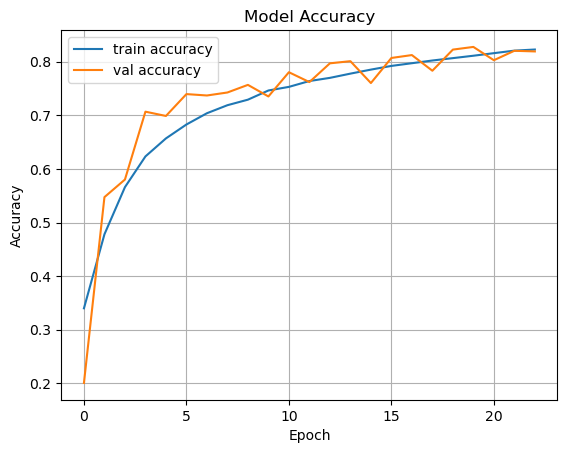

In [9]:
## Accuracy plot
plt.figure()
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

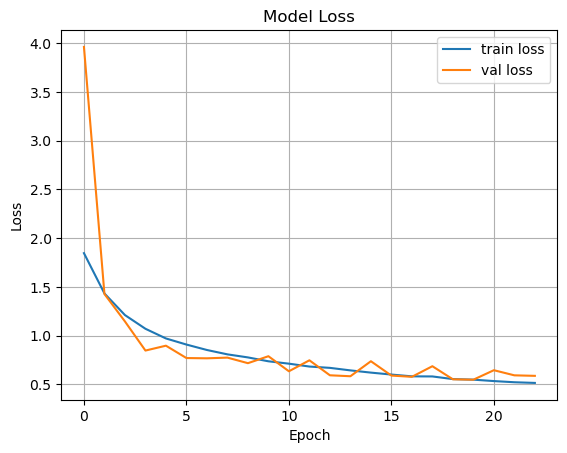

In [10]:
## Loss plot
plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


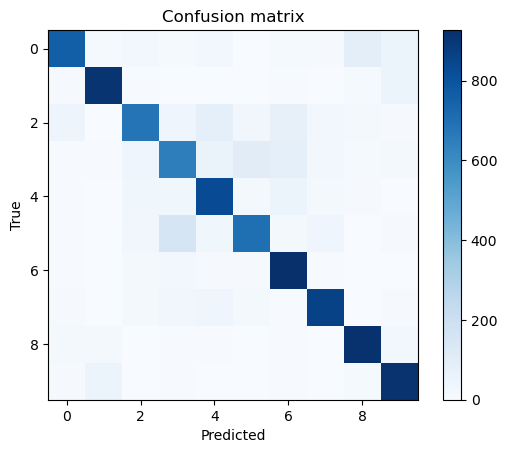

In [11]:
## Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure()
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()